In [2]:
pip install camb

Note: you may need to restart the kernel to use updated packages.


In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import mpl_toolkits.axes_grid1 as axgrid
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.rcParams['mathtext.fontset'], plt.rcParams['font.family'] = 'stix', 'STIXGeneral'
plt.rcParams.update({'font.size': 15})

camb_path = os.path.realpath(os.path.join(os.getcwd(),'..'))
sys.path.insert(0,camb_path)
import camb
from camb import model, initialpower
print('Using CAMB %s installed at %s'%(camb.__version__, os.path.dirname(camb.__file__)))

Using CAMB 1.3.2 installed at /opt/conda/lib/python3.9/site-packages/camb


# $P_{baryon}/P_{DMO}$ (I):
### ("halofit_version = 'takahashi'", varying baryonic feedback parameters)

Create a matter power spectrum, $P_{DMO}$, that does not contain baryonic feedback using "halofit_version = 'takahashi'":

In [4]:
### P_DMO base ###

pars_DMO = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, redshifts=[0], kmax=10,
                       As=2e-9, ns=0.96, halofit_version='takahashi')
results = camb.get_transfer_functions(pars_DMO)
kh_DMO, _ , pk_DMO = results.get_linear_matter_power_spectrum(hubble_units=True, k_hunit=True)

Create matter power spectrum, $P_{baryon}$, in which the HMCode parameters (A_baryon, eta_baryon, and logT_AGN) ae varied over a range $\approx \pm$ 5% of the default values:

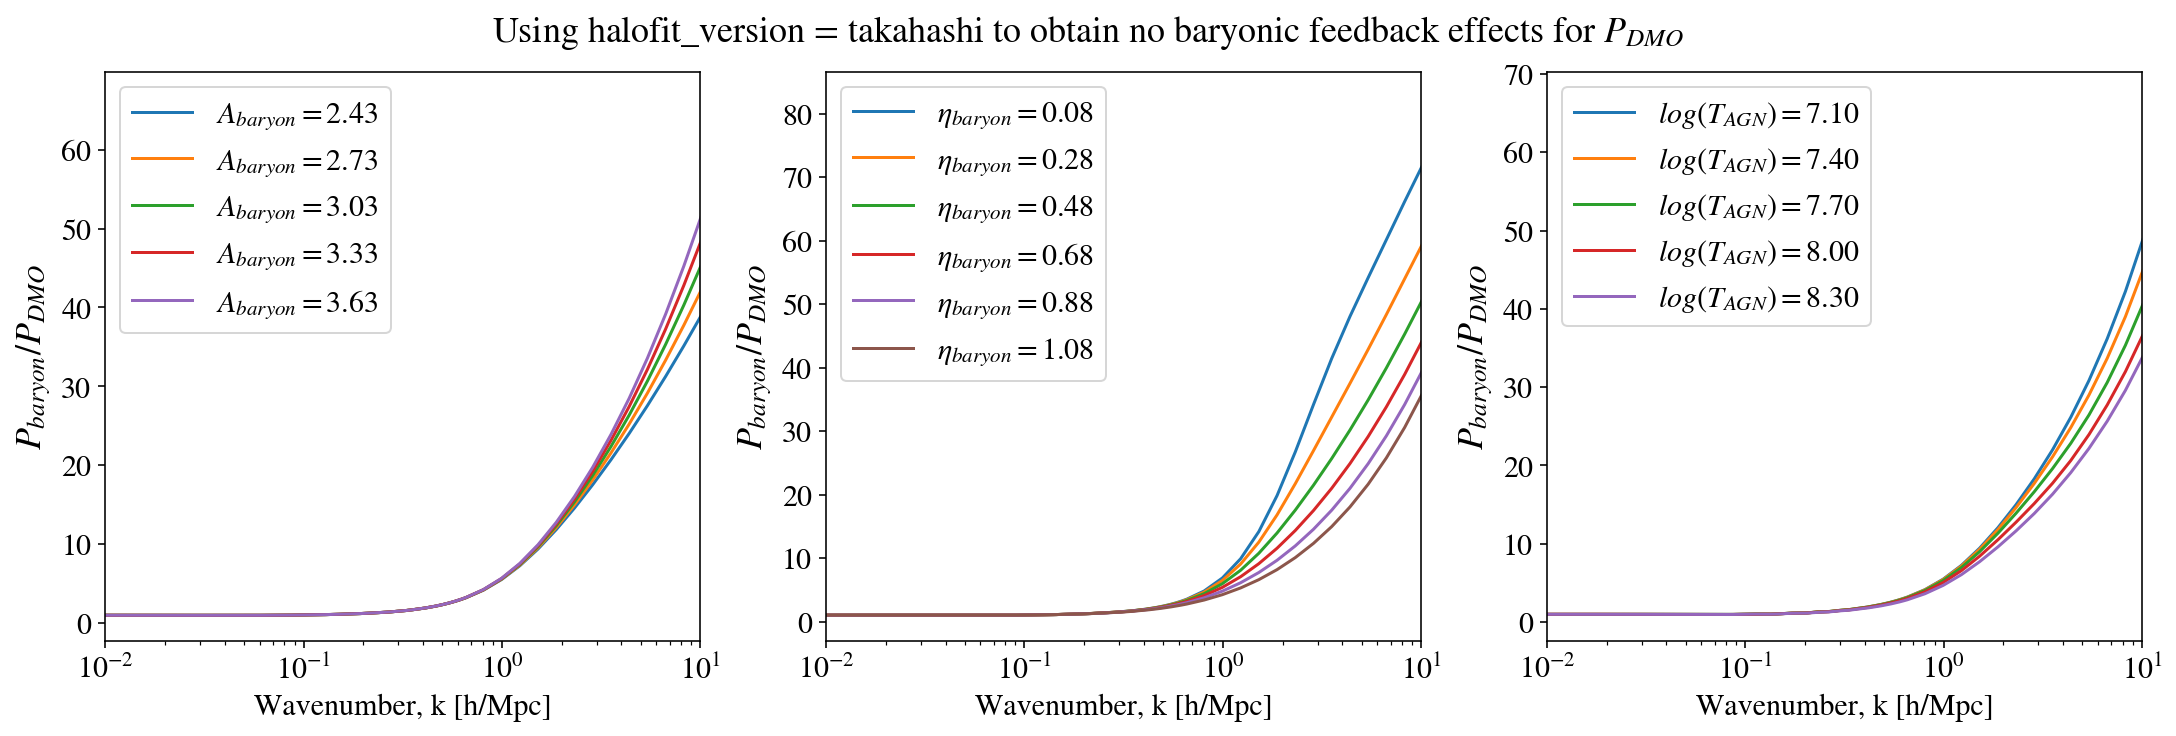

In [29]:
### Varying baryonic feedback params ###

A_feedbacks = np.arange(2.43, 3.83, 0.3)
eta_feedbacks = np.arange(0.08, 1.2, 0.2)
logT_AGN_feedbacks = np.arange(7.1, 8.5, 0.3)


fig, axs = plt.subplots(1,3, constrained_layout=True, figsize=(15,5))
plt.suptitle('Using halofit_version = takahashi to obtain no baryonic feedback effects for $P_{DMO}$')

for A in A_feedbacks:
    results.Params.NonLinearModel.set_params(halofit_version='mead', HMCode_A_baryon=A)
    results.calc_power_spectra()
    kh, _, pk = results.get_nonlinear_matter_power_spectrum(hubble_units=True, k_hunit=True)
    np.testing.assert_allclose(kh, kh_DMO)
    axs[0].semilogx(kh, pk[0,:]/pk_DMO[0,:])
    axs[0].set_xlim(1e-2,10)
axs[0].set_ylabel('$P_{baryon}/P_{DMO}$', fontsize=18)
axs[0].set_xlabel('Wavenumber, k [h/Mpc]')
axs[0].legend(['$A_{baryon} = %.2f$'%b for b in A_feedbacks], loc='best')

for eta in eta_feedbacks:
    results.Params.NonLinearModel.set_params(halofit_version='mead', HMCode_eta_baryon=eta)
    results.calc_power_spectra()
    kh, _, pk = results.get_nonlinear_matter_power_spectrum(hubble_units=True, k_hunit=True)
    np.testing.assert_allclose(kh, kh_DMO)
    axs[1].semilogx(kh, pk[0,:]/pk_DMO[0,:])
    axs[1].set_xlim(1e-2,10)
axs[1].set_ylabel('$P_{baryon}/P_{DMO}$', fontsize=18)
axs[1].set_xlabel('Wavenumber, k [h/Mpc]')
axs[1].legend(['$\\eta_{baryon} = %.2f$'%b for b in eta_feedbacks], loc='best')

for AGN in logT_AGN_feedbacks:
    results.Params.NonLinearModel.set_params(halofit_version='mead2020_feedback', HMCode_logT_AGN=AGN)
    results.calc_power_spectra()
    kh, _, pk = results.get_nonlinear_matter_power_spectrum(hubble_units=True, k_hunit=True)
    np.testing.assert_allclose(kh, kh_DMO)
    axs[2].semilogx(kh, pk[0,:]/pk_DMO[0,:])
    axs[2].set_xlim(1e-2,10)
axs[2].set_ylabel('$P_{baryon}/P_{DMO}$', fontsize=18)
axs[2].set_xlabel('Wavenumber, k [h/Mpc]')
axs[2].legend(['$log(T_{AGN}) = %.2f$'%b for b in logT_AGN_feedbacks], loc='best')

plt.show()

# $P_{baryon}/P_{DMO}$ (II): 
### ("halofit_version = 'mead2020_feedback'", HMCode=0, varying baryonic feedback parameters)

Instead of using 'takahashi, as was done above, we will instead create $P_{DMO}$ using 'mead2020_feedback' but then zeroing all of the HMCode parameters. This will create a nonlinear matter power spectrum that does not have baryonic feedback.

In [26]:
### P_DMO base ###

pars_DMO = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, redshifts=[0], kmax=10,
                           As=2e-9, ns=0.96, halofit_version='mead2020_feedback',
                           HMCode_A_baryon = 0, HMCode_eta_baryon = 0, HMCode_logT_AGN = -10)
results = camb.get_transfer_functions(pars_DMO)
kh_DMO, _ , pk_DMO = results.get_linear_matter_power_spectrum(hubble_units=True, k_hunit=True)

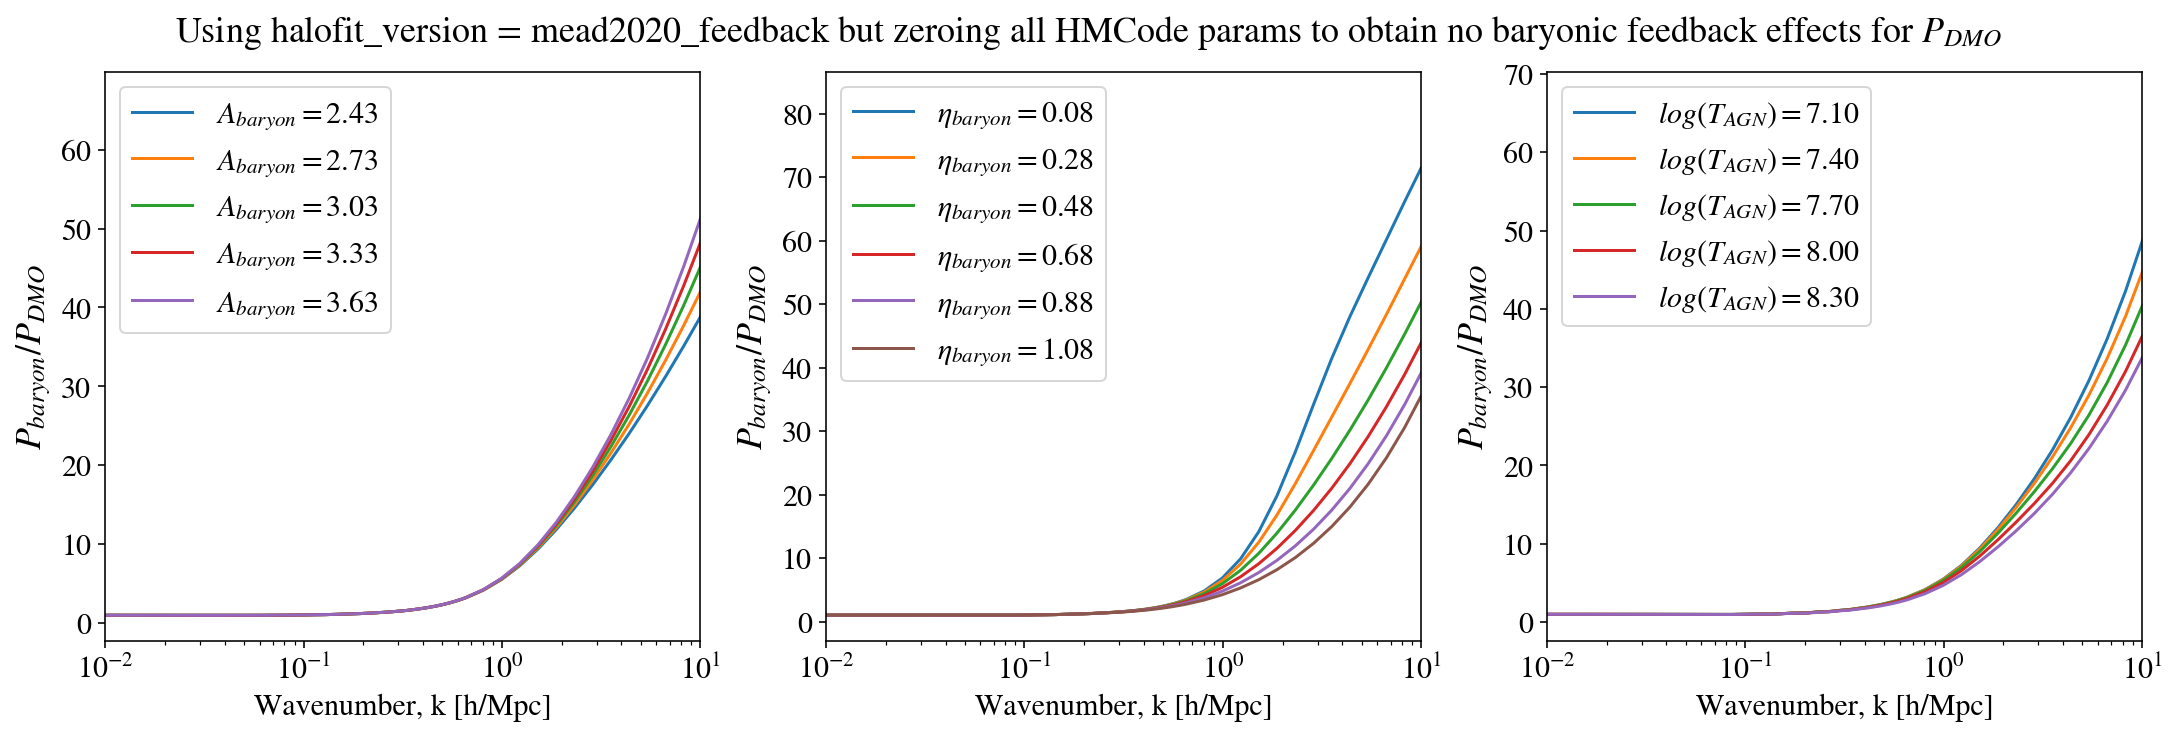

In [28]:
### Varying baryonic feedback params ###

A_feedbacks = np.arange(2.43, 3.83, 0.3)
eta_feedbacks = np.arange(0.08, 1.2, 0.2)
logT_AGN_feedbacks = np.arange(7.1, 8.5, 0.3)


fig, axs = plt.subplots(1,3, constrained_layout=True, figsize=(15,5))
plt.suptitle('Using halofit_version = mead2020_feedback but zeroing all HMCode params to obtain no baryonic feedback effects for $P_{DMO}$')

for A in A_feedbacks:
    results.Params.NonLinearModel.set_params(halofit_version='mead', HMCode_A_baryon=A)
    results.calc_power_spectra()
    kh, _, pk = results.get_nonlinear_matter_power_spectrum(hubble_units=True, k_hunit=True)
    np.testing.assert_allclose(kh, kh_DMO)
    axs[0].semilogx(kh, pk[0,:]/pk_DMO[0,:])
    axs[0].set_xlim(1e-2,10)
axs[0].set_ylabel('$P_{baryon}/P_{DMO}$', fontsize=18)
axs[0].set_xlabel('Wavenumber, k [h/Mpc]')
axs[0].legend(['$A_{baryon} = %.2f$'%b for b in A_feedbacks], loc='best')

for eta in eta_feedbacks:
    results.Params.NonLinearModel.set_params(halofit_version='mead', HMCode_eta_baryon=eta)
    results.calc_power_spectra()
    kh, _, pk = results.get_nonlinear_matter_power_spectrum(hubble_units=True, k_hunit=True)
    np.testing.assert_allclose(kh, kh_DMO)
    axs[1].semilogx(kh, pk[0,:]/pk_DMO[0,:])
    axs[1].set_xlim(1e-2,10)
axs[1].set_ylabel('$P_{baryon}/P_{DMO}$', fontsize=18)
axs[1].set_xlabel('Wavenumber, k [h/Mpc]')
axs[1].legend(['$\\eta_{baryon} = %.2f$'%b for b in eta_feedbacks], loc='best')

for AGN in logT_AGN_feedbacks:
    results.Params.NonLinearModel.set_params(halofit_version='mead2020_feedback', HMCode_logT_AGN=AGN)
    results.calc_power_spectra()
    kh, _, pk = results.get_nonlinear_matter_power_spectrum(hubble_units=True, k_hunit=True)
    np.testing.assert_allclose(kh, kh_DMO)
    axs[2].semilogx(kh, pk[0,:]/pk_DMO[0,:])
    axs[2].set_xlim(1e-2,10)
axs[2].set_ylabel('$P_{baryon}/P_{DMO}$', fontsize=18)
axs[2].set_xlabel('Wavenumber, k [h/Mpc]')
axs[2].legend(['$log(T_{AGN}) = %.2f$'%b for b in logT_AGN_feedbacks], loc='best')

plt.show()

# $P_{baryon}/P_{DMO}$ (III): 
### ("halofit_version = 'mead2020_feedback'", varying cosmological parameters)

In [24]:
### P_baryon base ###

pars_baryon = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, redshifts=[0], kmax=10,
                              As=2e-9, ns=0.96, halofit_version='mead2020_feedback') 
                              # we will use the default values for the HMCode parameters here: [3.13, 0.603, 7.8]
results = camb.get_transfer_functions(pars_baryon)
kh_baryon, _ , pk_baryon = results.get_nonlinear_matter_power_spectrum(hubble_units=True, k_hunit=True)

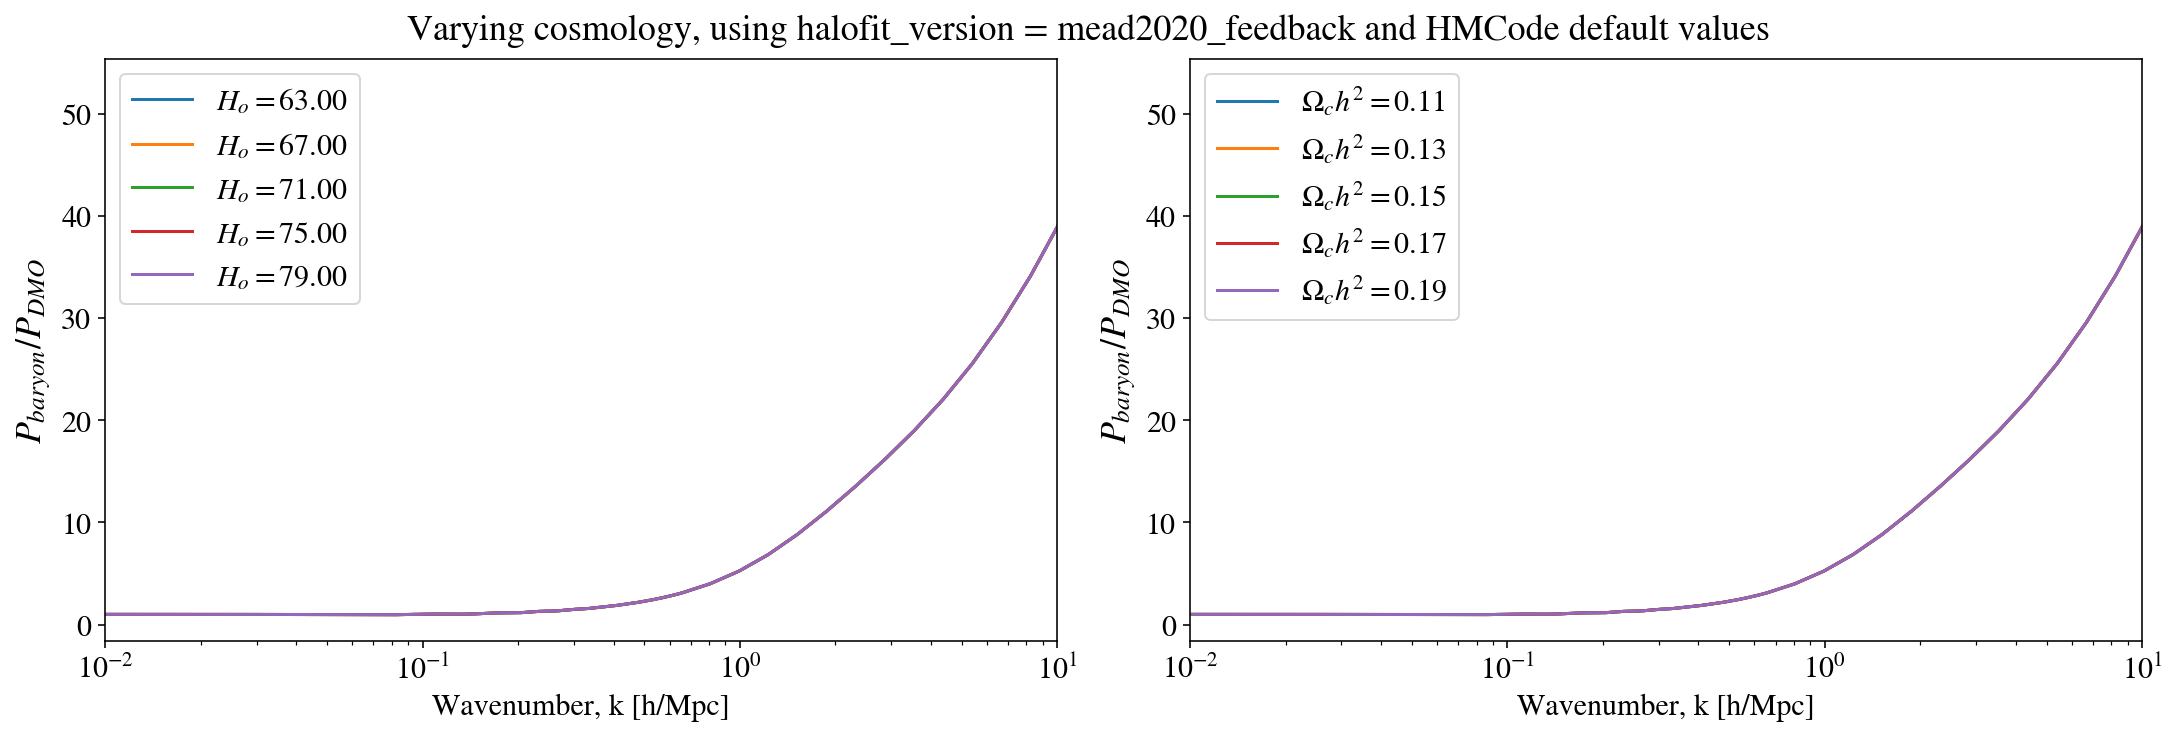

In [32]:
### Varying cosmological parameters ###

H0 = np.arange(63, 80, 4)
oc = np.arange(0.11, 0.20, 0.02)


fig, axs = plt.subplots(1,2, constrained_layout=True, figsize=(15,5))
plt.suptitle('Varying cosmology, using halofit_version = mead2020_feedback and HMCode default values')

for hubble in H0:
    pars_baryon.set_cosmology(H0=hubble)
    results.calc_power_spectra()
    kh, z, pk = results.get_linear_matter_power_spectrum()
    np.testing.assert_allclose(kh, kh_baryon)
    axs[0].semilogx(kh, pk_baryon[0,:]/pk[0,:])
    axs[0].set_xlim(1e-2,10)
axs[0].set_ylabel('$P_{baryon}/P_{DMO}$', fontsize=18)
axs[0].set_xlabel('Wavenumber, k [h/Mpc]')
axs[0].legend(['$H_o = %.2f$'%h for h in H0], loc='best')

for c in oc:
    pars_baryon.set_cosmology(H0=67.4, omch2=c)
    results.calc_power_spectra()
    kh, z, pk = results.get_linear_matter_power_spectrum()
    np.testing.assert_allclose(kh, kh_baryon)
    axs[1].semilogx(kh, pk_baryon[0,:]/pk[0,:])
    axs[1].set_xlim(1e-2,10)
axs[1].set_ylabel('$P_{baryon}/P_{DMO}$', fontsize=18)
axs[1].set_xlabel('Wavenumber, k [h/Mpc]')
axs[1].legend(['$\\Omega_ch^2 = %.2f$'%c for c in oc], loc='best')

plt.show()